In [17]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
#loading dataset
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# information about datset
insurance_dataset.shape

(1338, 7)

In [20]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Categorical Colums
### 1.Sex
### 2.Smoker
### 3.Region

# Data Analysis

In [22]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ADEEL\AppData\Local\Temp\ipykernel_9556\3575646133.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


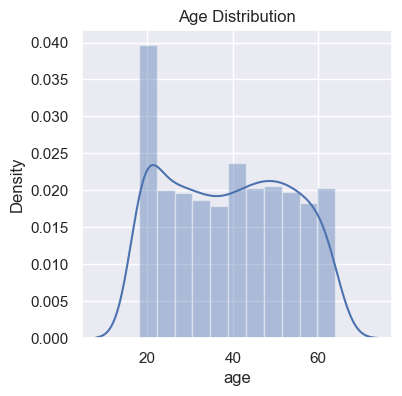

In [23]:
sns.set()
plt.figure(figsize =(4,4))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

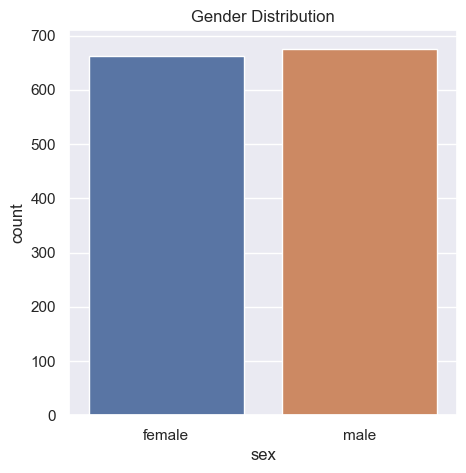

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [25]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\ADEEL\AppData\Local\Temp\ipykernel_9556\2127311671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


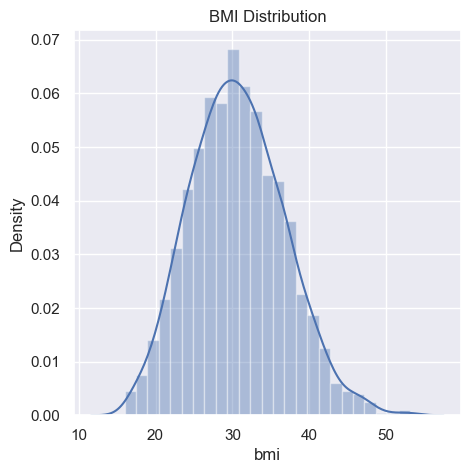

In [26]:
#bmi distribution
plt.figure(figsize =(5,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

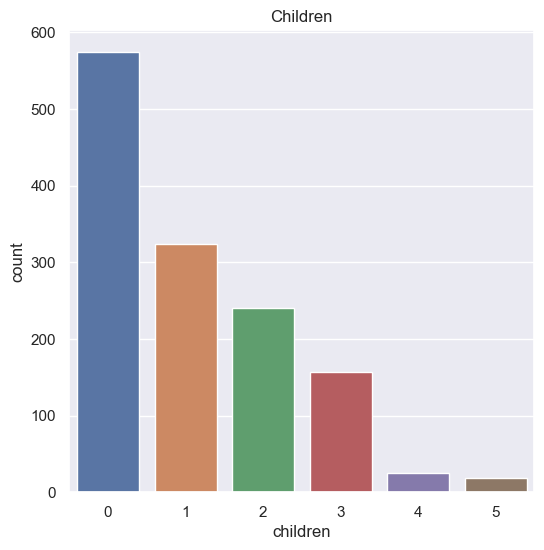

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [28]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

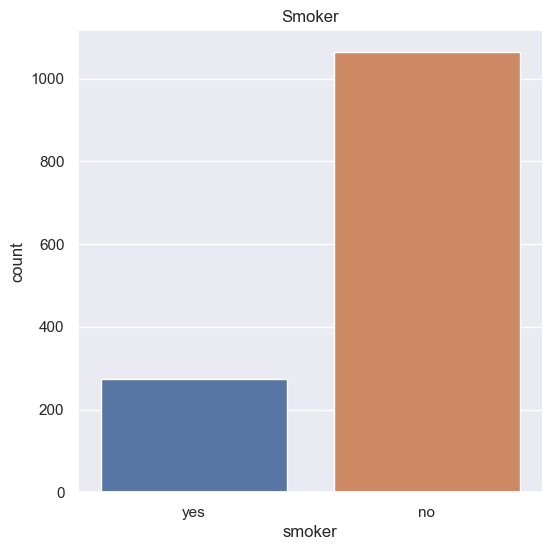

In [29]:
#smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [30]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

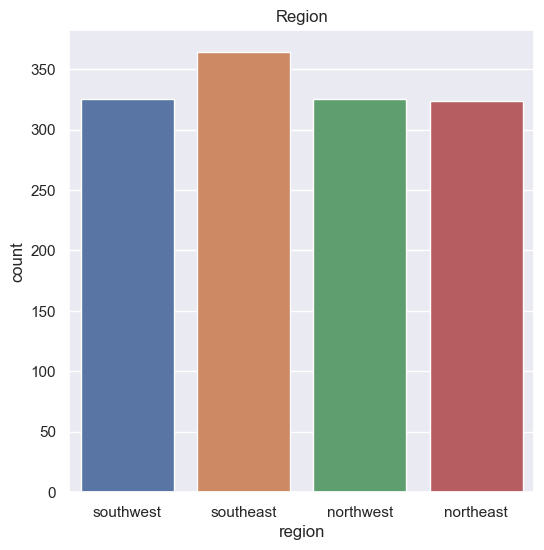

In [31]:
#Region
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [32]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\ADEEL\AppData\Local\Temp\ipykernel_9556\552591684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


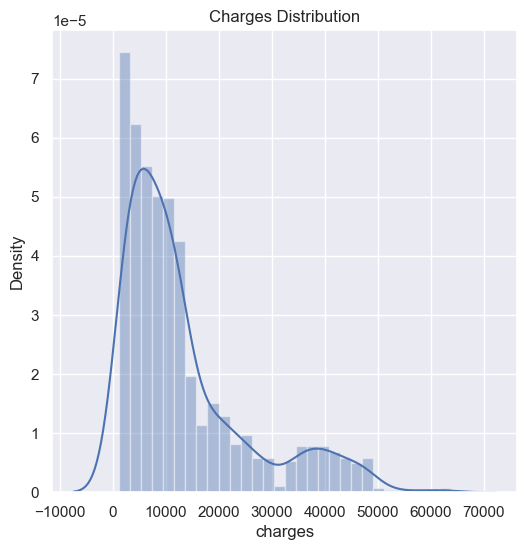

In [33]:
#charge distribution
plt.figure(figsize =(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre Processing

In [34]:
#encoding of categorical features
#gender column
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

#somker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

#region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1, 'northeast':2,'northwest':3}},inplace=True)

## Splitting the Dataset

In [35]:
x= insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']

In [36]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Training and Testing Data

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)


In [38]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Taraining using Linear Regression

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [41]:
training_data_prediction = regressor.predict(x_train)

In [43]:
#R square value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print("R Square Value",r2_train)

R Square Value 0.751505643411174


In [44]:
test_data_prediction = regressor.predict(x_test)

In [45]:
#R square value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R Square Value",r2_test)

R Square Value 0.7447273869684077


### Building A Predictive System

In [49]:
input_data = (59,1,27.72,3,1,0)

#changing input data into numpy array
input_data_nparray = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_nparray.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The Insurance Cost Is USD =",prediction[0])

The Insurance Cost Is USD = 13194.926955939927


C:\Users\ADEEL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
